<a href="https://colab.research.google.com/github/RSalgadoAyala/Python_test/blob/main/Text_Mining_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Analytics using NLTK**. *from data camp*

Python NTLK (natural language tooklit) sentiment analysis

NLP (Natural Language processing) enables the computer to interact with humans in a natural manner. It helps the computer to understand the human language and derive meaning from it. NLP is applicable in several problematic from speech recognition, language translation, classifying documents to information extraction. Analyzing movie review is one of the classic examples to demonstrate a simple NLP Bag-of-words model, on movie reviews.

**Text mining** also referred to as text analytics. Text mining is a process of exploring sizeable textual data and find patterns. Text Mining process the text itself, while **NLP** process with the underlying metadata. 

Finding frequency counts of words, length of the sentence, presence/absence of 
specific words is known as text mining. 

Natural language processing is one of the components of text mining. 

NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. 

In Text Analytics, statistical and machine learning algorithm used to classify information.

**NLTK** is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. *NLTK helps the computer to analysis, preprocess, and understand the written text.*


In [31]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# loading NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Tokenization**

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [2]:
from nltk.tokenize import sent_tokenize
text='Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You should not eat cardboard'
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', 'You should not eat cardboard']


**Word Tokenization**

Word tokenizer breaks text paragraph into words.

In [3]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', 'not', 'eat', 'cardboard']


**Frequency Distribution**

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [5]:
fdist.most_common(2)

[('is', 3), (',', 2)]

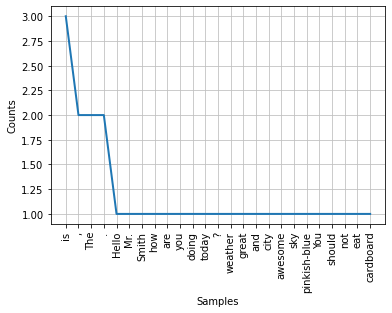

In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

**Stopwords**

*Stopwords considered as noise in the text.* Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'any', "couldn't", 've', 'be', 'while', "wasn't", 'can', 'd', 'himself', 'such', 'only', 'he', 'does', 'whom', 'that', 'we', 'was', 'of', "isn't", 'has', 'again', 'your', 'you', 'am', 'mightn', 'not', 'hers', 'through', 'which', 'both', 'won', 'their', 'myself', "mightn't", 'all', 'now', 'yourselves', 'were', 'haven', 's', 'yourself', 'just', 'him', 'each', 'why', 'into', 'there', 'other', 'didn', 'itself', 'shan', 'have', "you'd", 'at', 'the', 'more', 'herself', "needn't", 'during', "didn't", 'mustn', 'had', 'isn', 'down', 'hasn', 'having', 'here', "should've", 'y', 'are', 'ourselves', 'our', 'doesn', 'about', 'is', 'o', 'too', 'who', "she's", "shan't", "you'll", 'i', 'me', 'to', 'and', 'this', 'few', 'then', 'so', 'most', 'but', 'her', 'theirs', 'hadn', 'below', 'ain', 'being', 'ours', 'under', 'yours', "hasn't", "weren't", 'if', 'or', 'with', 'aren', 'before', 'will', "mustn't", 'very', 'these', 're', 'm', "aren't", 'ma', 'up', 'needn', 'off', "wouldn't", "it's", 'shouldn', 'than',

**Removing Stopwords**

In [8]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', 'not', 'eat', 'cardboard']
Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', 'eat', 'cardboard']


**Lexicon Normalization**

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

**Stemming**

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [9]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', 'eat', 'cardboard']


**Lemmatization**

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [12]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


**POS Tagging**

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [13]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [16]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

**Sentiment Analysis**

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

Human communication just not limited to words, it is more than words. Sentiments are combination words, tone, and writing style. As a data analyst, It is more important to understand our sentiments, what it really means?

There are mainly two approaches for performing sentiment analysis.


*   Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.
*   Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.



# **Text Classification**
Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. In the next section, you will learn how you can do text classification in python.

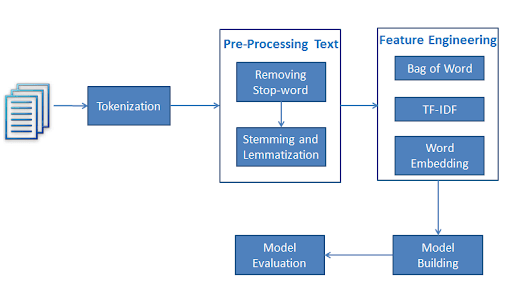

# **Performing Sentiment Analysis using Text Classification**

**Loading Data**

Till now, you have learned data pre-processing using NLTK. Now, you will learn Text Classification. You will perform Multi-Nomial Naive Bayes Classification using scikit-learn.

In the model the building part, you can use the "Sentiment Analysis of Movie, Reviews" dataset available on Kaggle. The dataset is a tab-separated file. Dataset has four columns PhraseId, SentenceId, Phrase, and Sentiment.

This data has 5 sentiment labels:

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [18]:
data=pd.read_csv('https://raw.githubusercontent.com/RSalgadoAyala/Python_test/main/train.tsv?/raw=true',sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [20]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

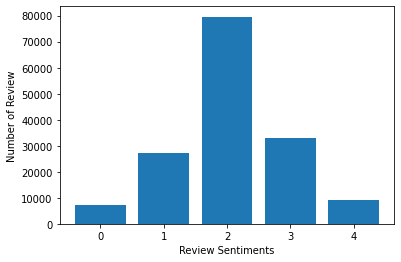

In [22]:
Sentiment_count=data.groupby('Sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

**Feature Generation using Bag of Words**

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

Example: There are three documents:

Doc 1: I love dogs. Doc 2: I hate dogs and knitting. Doc 3: Knitting is my hobby and passion.

Now, you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM).
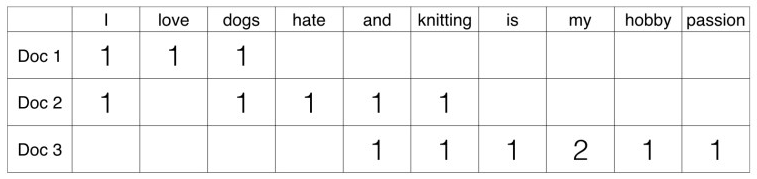

This matrix is using a single word. It can be a combination of two or more words, which is called a bigram or trigram model and the general approach is called the n-gram model.

You can generate document term matrix by using scikit-learn's CountVectorizer.


In [24]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

**Split train and test set**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

**Model Building and Evaluation**

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [28]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


Well, you got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

**Feature Generation using TF-IDF**

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

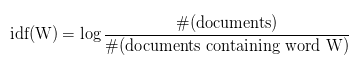

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

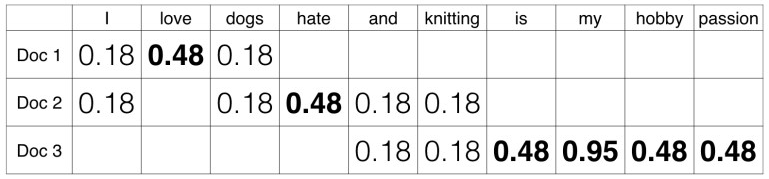


In [30]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

**Split train and test set (TF-IDF)**

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

**Model Building and Evaluation (TF-IDF)**

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [33]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


Well, you got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve the accuracy by using some other preprocessing or feature engineering. Let's suggest in comment box some approach for accuracy improvement.